In [1]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Import dataset
dataset=pd.read_csv("tennis.csv")

In [3]:
dataset

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
x = dataset.iloc[:, :-1] . values
y = dataset.iloc[:, -1] . values

In [6]:
dataset.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder_x=LabelEncoder()

In [9]:
x[:, 0]=labelencoder_x.fit_transform(x[:, 0])

In [10]:
x[:, 1]=labelencoder_x.fit_transform(x[:, 1])

In [11]:
x[:, 2]=labelencoder_x.fit_transform(x[:, 2])

In [12]:
x[:, 3]=labelencoder_x.fit_transform(x[:, 3])

In [14]:
x

array([[2, 1, 0, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [1, 2, 1, 0],
       [2, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 1]], dtype=object)

In [15]:
labelencoder_y=LabelEncoder()

In [16]:
y=labelencoder_y.fit_transform(y)

In [17]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [18]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((11, 4), (3, 4))

In [20]:
y_train.shape, y_test.shape

((11,), (3,))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3333


In [26]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

[Text(0.3333333333333333, 0.875, 'x[0] <= -0.746\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.625, 'x[1] <= 0.069\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 0.283\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

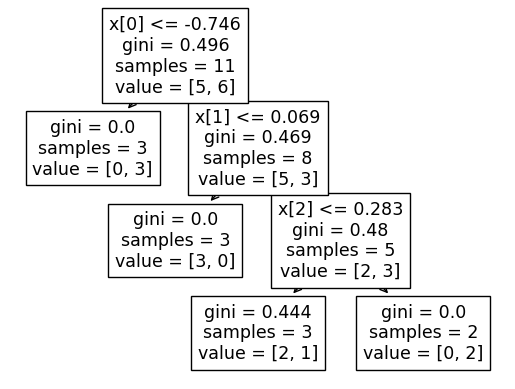

In [27]:
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [28]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.3333


[Text(0.3333333333333333, 0.875, 'x[0] <= -0.746\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.625, 'x[1] <= 0.069\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 0.283\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

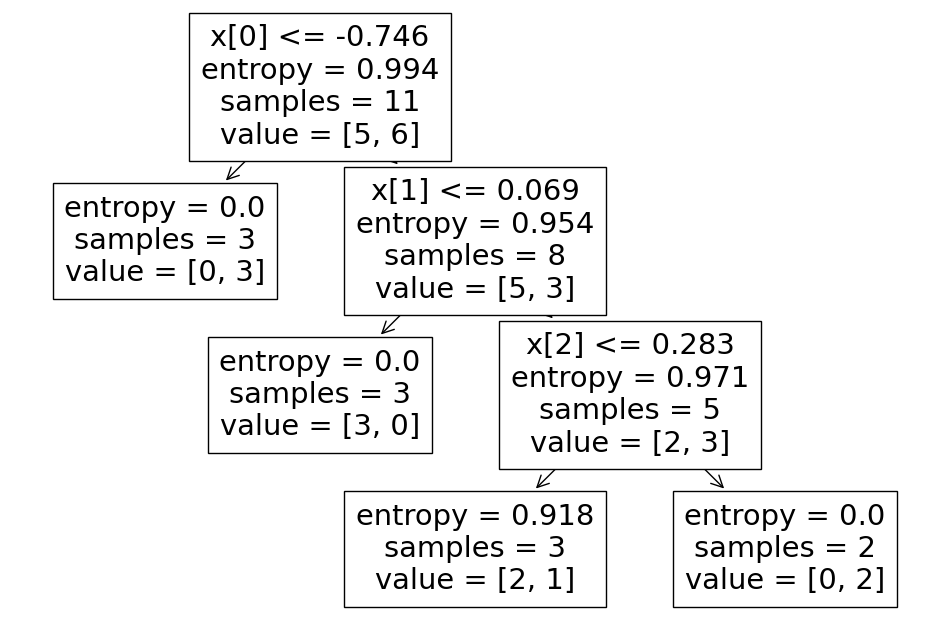

In [31]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [32]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[0 0]
 [2 1]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7]
}

In [35]:
# Instantiate the DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=0)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [41]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7]})

In [42]:
print("Best parameters found by grid search:", grid_search.best_params_)

# Get the best model found by GridSearchCV
best_clf = grid_search.best_estimator_

# Use the best model to make predictions and evaluate its accuracy
y_pred_best = best_clf.predict(X_test)
print('Model accuracy score with best parameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred_best)))

Best parameters found by grid search: {'criterion': 'gini', 'max_depth': 3}
Model accuracy score with best parameters: 0.3333
